In [1]:
from pysb import Model, Monomer, Parameter, Expression,  Rule, Observable, Initial
from pysb.simulator import ScipyOdeSimulator
import numpy as np
import matplotlib.pyplot as plt

# Try with Initial(..., fixed=True)

In [2]:
Model()
model.name='test_fixed'

In [3]:
Monomer('X',['b'])
Monomer('Y',['b'])

Monomer('Y', ['b'])

In [4]:
Parameter('k_XY', .1)

Parameter('X_0', 1)
Parameter('Y_0', 1)

Initial(X(b=None), X_0, fixed=True)
Initial(Y(b=None), Y_0)

Initial(Y(b=None), Y_0)

In [5]:
Observable('X_y', X(b=None))
Observable('Y_y', Y(b=None))
Observable('XY_y', X(b=1)%Y(b=1))

Observable('XY_y', X(b=1) % Y(b=1))

In [6]:
Rule('convert', X(b=None) + Y(b=None) >> X(b=1)%Y(b=1), k_XY)

Rule('convert', X(b=None) + Y(b=None) >> X(b=1) % Y(b=1), k_XY)

In [7]:
sim = ScipyOdeSimulator(model);

In [8]:
tspan = np.linspace(0, 50, 1000)

## X should have a constant concentration at 1.0

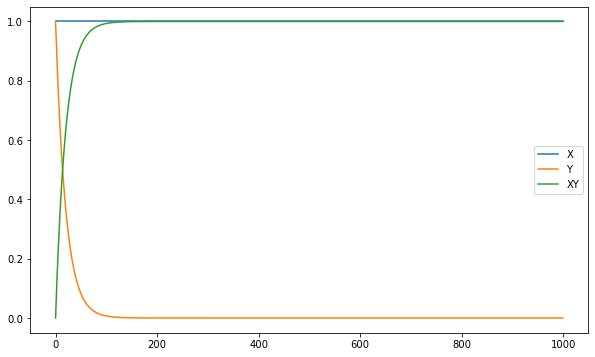

In [9]:
res = sim.run(tspan, param_values={
    'k_XY':1,
})
y = res.all

plt.figure(figsize=(10,6))
plt.plot(y['X_y'], label='X')
plt.plot(y['Y_y'], label='Y')
plt.plot(y['XY_y'], label='XY')
plt.legend()

## Try to change to fixed=False

In [10]:
model.initials

[Initial(X(b=None), X_0, fixed=True), Initial(Y(b=None), Y_0)]

In [11]:
model.initials[0].fixed = False

### Must run model.reset_equations to make change the "fixed" state of the initial condition

In [12]:
model.reset_equations()

In [13]:
sim = ScipyOdeSimulator(model);

In [14]:
res = sim.run(tspan, param_values={
    'k_XY':1,
})
y = res.all

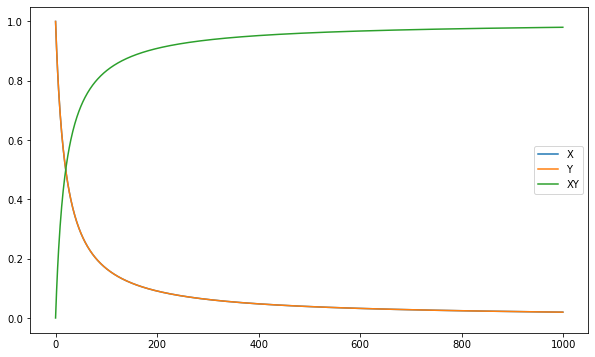

In [15]:
plt.figure(figsize=(10,6))
plt.plot(y['X_y'], label='X')
plt.plot(y['Y_y'], label='Y')
plt.plot(y['XY_y'], label='XY')
plt.legend()

## The concentration of X now is "unfixed" and decreases as expected